In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("weight-height.csv")

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [5]:
df['Height'].skew()

0.04936908937689031

In [6]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [7]:
df['Weight'].skew()

0.03295450444592437

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_11712\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

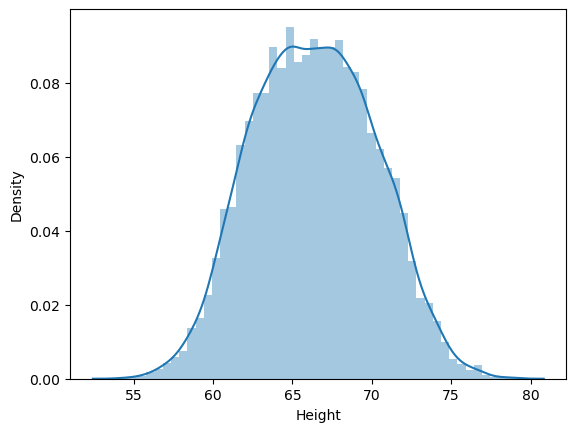

In [8]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

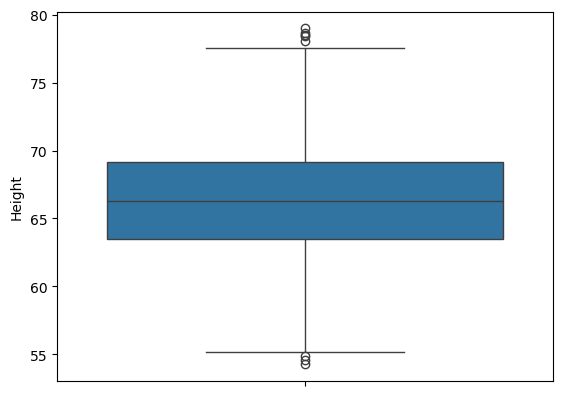

In [10]:

sns.boxplot(df['Height'])

In [12]:
upper_limit =df['Height'].quantile(.99)
upper_limit

74.7857900583366

In [15]:
lower_limit=df['Weight'].quantile(0.01)

In [16]:
lower_limit

97.03287365980914

In [30]:
#trimming
trim_df = df[(df['Height'] <= 74.78) & (df['Weight'] >= 97.03)]

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Height, dtype: float64

In [32]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [33]:
df

,Gender,Height,Weight
0,Male,74.78579,241.893563
1,Male,74.78579,162.310473
2,Male,74.78579,212.740856
3,Male,74.78579,220.042470
4,Male,74.78579,206.349801
...,...,...,...
9995,Female,74.78579,136.777454
9996,Female,74.78579,170.867906
9997,Female,74.78579,128.475319
9998,Female,74.78579,163.852461
